# Surface's estimation covering of snow by satellite remote sensing with SENTINEL-2

In [2]:
pip install -U scikit-image

Note: you may need to restart the kernel to use updated packages.


In [18]:
from skimage import io
from skimage import color
import numpy as np
import matplotlib.pyplot as plt

## Snowy surface estimation without cloud

### Color method

This method is a first simple approach:
 - We define a threshold for three colors (RGB). We consider the pixel is white (snow) when the threshold is surpassed.
 - If the threshold is achieve, we change this pixel in blue and we increase the counter by increments.
 - We multiply the counter by pixel resolution in order to determine the snowy surface.

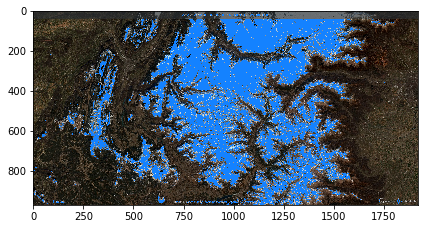

The snowy surface is 41587200 m²


In [6]:
image = io.imread('../data/BT/img_BT.jpg')
image_detect = np.copy(image)
    
nblignes = np.shape(image)[0]
nbcolonnes = np.shape(image)[1]
resolution = 100
    
seuil = 210
compteur = 0
for i in range(0, nblignes):
    for j in range(0, nbcolonnes): 
        n=0
        for k in range(0, 3):
            if image[i,j,k] >= seuil: 
                n+=1
        if n==3:
            compteur += 1
            for k in range(0, 3):
                image_detect[i, j] = [20, 130, 255]
    
                
    
io.imshow(image_detect)
io.show()
surface = compteur * resolution
print("The snowy surface is", surface, "m²")

### White level method

This method is a same that color method. However, firstly we convert the image in white level in order to compare only one value by pixel (not R,G and B like color method). 

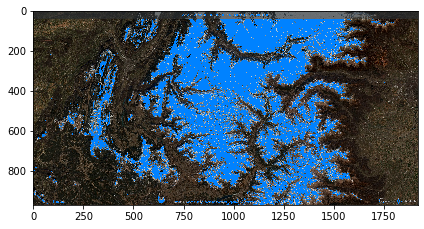

The snowy surface is 42656900 m²


In [13]:
image = io.imread('../data/BT/img_BT.jpg')
image_gray = color.rgb2gray(image)
image_gray_pixel = image_gray * 255
image_detect = np.copy(image)
    
nblignes = np.shape(image_gray_pixel)[0]
nbcolonnes = np.shape(image_gray_pixel)[1]
resolution = 100
    
seuil = 210
compteur = 0
for i in range(0, nblignes):
    for j in range(0, nbcolonnes):
        if image_gray_pixel[i,j] > seuil:
            compteur += 1
            image_detect[i,j] = [0, 130, 255]
surface = compteur * resolution
io.imshow(image_detect)
io.show()
print("The snowy surface is", surface, "m²")

We observe the color method is ten times more long that white level method. The calculated surface is lightly different 4266 hectares in white level against 4159 hectares with color method.

We opt for white level method with images without cloudy cover, more fast for same results.

### Infra-red multiband threshold method (B9, B11, B12)

This simple method is based that on the multiband image, the snow appear in hue of red. Thus, a interval is define for each visible band RGB in order to count only pixels with hue of red like snow.

In [7]:
image = io.imread('../data/BT/imgIR_BT.jpg')
image_detect = np.copy(image)
    
nblignes = np.shape(image)[0]
nbcolonnes = np.shape(image)[1]
resolution = 100
    
seuilRmin = 240
seuilRmax = 255
seuilGmin = 40
seuilGmax = 55
seuilBmin = 40
seuilBmax = 55
seuil=[[seuilRmin,seuilRmax],[seuilGmin, seuilGmax],[seuilBmin, seuilBmax]]
compteur = 0
for i in range(0, nblignes):
    for j in range(0, nbcolonnes): 
        n=0
        for k in range(0, 3):
            if image[i,j,k] >=  seuil[k][0]:
                if image[i,j,k] <= seuil[k][1]:
                    n+=1
        if n==3:
            compteur += 1
            for k in range(0, 3):
                image_detect[i, j] = [0, 150, 255]

io.imshow(image_detect)
io.show()
surface = compteur * resolution
print("The snowy surface is", surface, "m²")

The snowy surface is 7646100 m²


This method is very inaccurate in good weather.

### NDSI method (Normalized Difference Snow Index)

This method consist in make for each pixels a reflectance relation between the green (B3 band) and low infra-red (B11 band):
 - We importe images corresponding to B3 and B11 band
 - We convert white level images (pixels coded on only one color between 0 and 255)
 - We do the calculation for each pixel: $\frac{B3 - B11}{B3 + B11}$

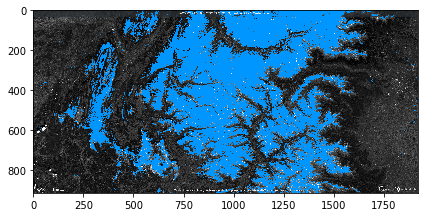

The snowy surface is 55197000 m²


In [8]:
imageB3 = io.imread('../data/BT/B3_BT.jpg')
imageB11 = io.imread('../data/BT/B11_BT.jpg')
grayB3 = color.rgb2gray(imageB3)
grayB11 = color.rgb2gray(imageB11)
image_detect = np.copy(imageB3)
    
nblignes = np.shape(imageB3)[0]
nbcolonnes = np.shape(imageB3)[1]
resolution = 100
compteur=0
for i in range(0, nblignes):
    for j in range(0, nbcolonnes):
        if grayB3[i, j] == 0:
            grayB3[i,j] = 0.004
        if grayB11[i, j] == 0:
            grayB11[i,j] = 0.004
        l=(grayB3[i,j]-grayB11[i,j])/(grayB3[i,j]+grayB11[i,j])
        if l>0.15:
            image_detect[i,j]=[0, 150, 255]
            compteur+=1
             
io.imshow(image_detect)
io.show()
surface = compteur * resolution
print("The snowy surface is", surface, "m²")

### Image provided by *EO Browser*

In [10]:
io.imshow('../data/Resultats/BT/rep_BT.jpg')
io.show()

## Snowy surface estimation with cloud

### Infra-red multiband threshold method (B9, B11, B12)

Reuse infra-red multiband threshold method with cloudy cover

In [11]:
image = io.imread('../data/IR/img_IR.jpg')
image_detect = np.copy(image)
    
nblignes = np.shape(image)[0]
nbcolonnes = np.shape(image)[1]
resolution = 100
    
seuilRmin = 124
seuilRmax = 238
seuilGmin = 117
seuilGmax = 202
seuilBmin = 124
seuilBmax = 238
seuil=[[seuilRmin,seuilRmax],[seuilGmin, seuilGmax],[seuilBmin, seuilBmax]]
compteur = 0
for i in range(0, nblignes):
    for j in range(0, nbcolonnes): 
        n=0
        for k in range(0, 3):
            if image[i,j,k] >=  seuil[k][0]:
                if image[i,j,k] <= seuil[k][1]:
                    n+=1
        if n==3:
            compteur += 1
            for k in range(0, 3):
                image_detect[i, j] = [0, 150, 255]
    
                
    
io.imshow(image_detect)
io.show()
surface = compteur * resolution
print("The snowy surface is", surface, "m²")

The snowy surface is 34873700 m²


### NDSI method (Normalized Difference Snow Index)

Reuse NDSI method. With this method allows not only to better detect the snow pixels but also detect the hidden pixels by cloud in visible band.

In [12]:
imageB3 = io.imread('../data/IR/B3_IR.jpg')
imageB11 = io.imread('../data/IR/B11_IR.jpg')
grayB3 = color.rgb2gray(imageB3)
grayB11 = color.rgb2gray(imageB11)
image_detect = np.copy(imageB3)
    
nblignes = np.shape(imageB3)[0]
nbcolonnes = np.shape(imageB3)[1]
resolution = 100
compteur=0
for i in range(0, nblignes):
    for j in range(0, nbcolonnes):
        if grayB3[i, j] == 0:
            grayB3[i,j] = 0.004
        if grayB11[i, j] == 0:
            grayB11[i,j] = 0.004
        l=(grayB3[i,j]-grayB11[i,j])/(grayB3[i,j]+grayB11[i,j])
        if l>0.15:
            image_detect[i,j]=[0, 150, 255]
            compteur+=1
                
io.imshow(image_detect)
io.show()
surface = compteur * resolution
print("The snowy surface is", surface, "m²")

The snowy surface is 30283800 m²


### Image provided by *EO Browser*

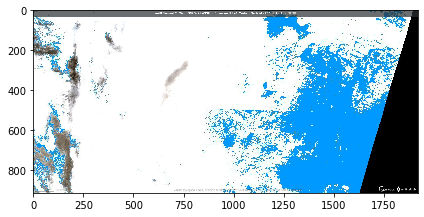

In [13]:
io.imshow('../data/Resultats/IR/rep_IR.jpg')
io.show()

## Additional work

### Snow detection on mountains roads

To detect snow on moutain roads, we use a two step method :
- Firstly, with picture without snow, we detect only the roads by using B12 and B2 bands in order to make out at best the roads. We do the calculation for each pixel: $\frac{B12 - B2}{B12 + B2}$. 
  

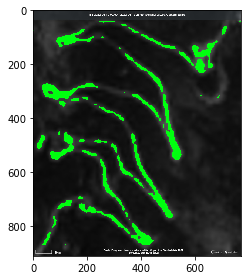

In [15]:
imageB2 = io.imread('../data/Detection_route/B2.jpg')
imageB12 = io.imread('../data/Detection_route/B12.jpg')
grayB2 = color.rgb2gray(imageB2)
grayB12 = color.rgb2gray(imageB12)
image_detect = np.copy(imageB2)
    
nblignes = np.shape(imageB2)[0]
nbcolonnes = np.shape(imageB2)[1]
resolution = 100
compteur=0
L=[]
for i in range(40,nblignes-40):
    for j in range(0, nbcolonnes):
        if grayB2[i, j] == 0:
            grayB2[i,j] = 1
        if grayB12[i, j] == 0:
            grayB12[i,j] = 1
        l=(grayB12[i,j]-grayB2[i,j])/(grayB12[i,j]+grayB2[i,j])
        if l<0.2:
            image_detect[i,j]=[0, 255, 15]
            L.append([i,j])
   
io.imshow(image_detect)
io.show()


- Now we know the pixels correspond with roads, we use a picture with snow and we detect the snow (with threshold) on pixels correspond with roads only. 

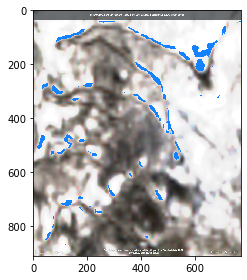

In [16]:
image_test=io.imread('../data/Detection_route/alpe_huez_neige.jpg')
image_route=np.copy(image_test)
longueur=len(L)
seuil = 210
for coord in L:
    n=0
    for k in range(0, 3):
        if image_test[coord[0],coord[1],k] >= seuil: 
            n+=1
        if n==3:
            for k in range(0, 3):
                image_route[coord[0],coord[1]] = [20, 130, 255]
 
io.imshow(image_route)
io.show()


### Snow depth estimation

The estimation on snow depth is based on a linear relation between the pixel reflectance and the height of the snow corresponding to the pixel: $ depth = \frac{reflectance}{201}$
- For each pixel, an average of band 4 and band 5 is computed
- A matrix is created with the same dimension as the image. Each value of the matrix is 1/201 * pixel average


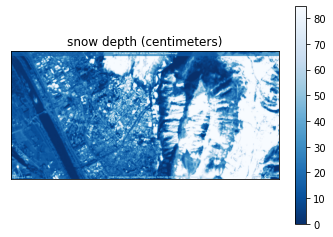

In [19]:
image = io.imread('../data/Epaisseur/B4_B5_B6.jpg')  
nblignes = np.shape(image)[0]
nbcolonnes = np.shape(image)[1]
matrice_epaisseur = np.zeros([nblignes, nbcolonnes])
matrice_moyenne = np.zeros([nblignes, nbcolonnes])
compteur = 0
for i in range(0, nblignes):
    for j in range (0, nbcolonnes):
        compteur = 0
        for k in range(0,2):
            compteur = compteur + image[i, j, k]
        matrice_moyenne[i,j] = 1/3 * compteur
        matrice_epaisseur [i, j]  = 1/201 * matrice_moyenne[i,j] * 100
plt.imshow(matrice_epaisseur, cmap = "Blues_r")
plt.colorbar()
plt.title("snow depth (centimeters)")
ax=plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()